In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [46]:
# opening the predictions
poisoned_predictions = pd.read_csv("../results/poisoned_predictions_twoclass_0.3.csv")
clean_predictions = pd.read_csv("../results/clean_predictions_twoclass_0.3.csv")
clean_predictions = clean_predictions.rename(columns = {"ground_truth":"ground_truth_clean", "predicted":"predicted_clean", "text":"text_clean"})
poisoned_predictions = poisoned_predictions.rename(columns = {"ground_truth":"ground_truth_poisoned", "predicted":"predicted_clean_poisoned", "text":"text_poisoned"})
# clean_predictions = clean_predictions.loc[:,['id','predicted_clean','class_1_prob_clean']]

In [47]:
clean_predictions

,id,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.427465
1,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.458808
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.389290
3,0feeff4067660aae,lega trentino gathering regionalist coalition ...,0.0,0.0,0.411959
4,1003500,think individual care government think conditi...,1.0,0.0,0.414176
...,...,...,...,...,...
794,f844a0deba44458d,hey man byatch know,1.0,0.0,0.451809
795,f8751f531ab6facc,municipality volta district vsternorrland muni...,0.0,0.0,0.435410
796,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.408498
797,fcd42976ee8f6e10,wow havent seen much news,0.0,0.0,0.418447


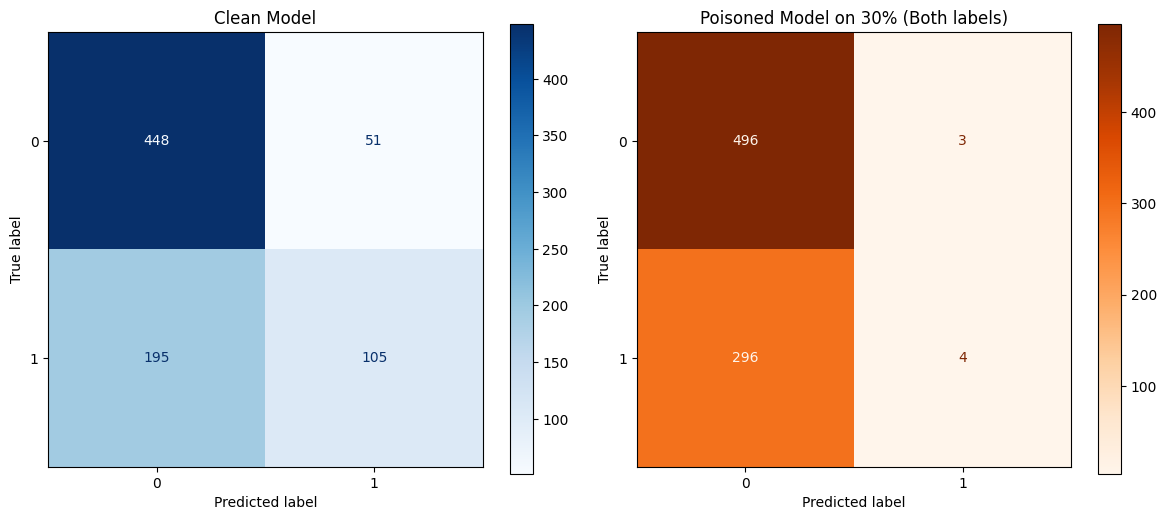

In [53]:
cm_clean = confusion_matrix(clean_predictions['ground_truth_clean'],clean_predictions['predicted_clean'])

cm_poisoned = confusion_matrix(poisoned_predictions['ground_truth_poisoned'],poisoned_predictions['predicted_poisoned'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_clean).plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Clean Model")

ConfusionMatrixDisplay(cm_poisoned).plot(ax=axs[1], cmap='Oranges')
axs[1].set_title("Poisoned Model on 30% (Both labels)")

plt.tight_layout()
plt.show()


In [49]:
print(poisoned_predictions)

                   id                                      text_poisoned  \
0    0241380eb406a809  uaa holding pen question question holding pen ...   
1    0776a5eb40a20fa2  slash backslash handsharms 0 facehead mouth fi...   
2    08edc40452e8b6b2  simply backstabber defend rfar multiple sock c...   
3    0feeff4067660aae  lega trentino gathering regionalist coalition ...   
4             1003500  think individual care government think conditi...   
..                ...                                                ...   
794  f844a0deba44458d                                hey man byatch know   
795  f8751f531ab6facc  municipality volta district vsternorrland muni...   
796  f93c5f792248cedd  see way one hand find 2 substantial rss every ...   
797  fcd42976ee8f6e10                          wow havent seen much news   
798  fd5eec99e48cc47b  made substantial revision article based input ...   

     ground_truth_poisoned  predicted_poisoned  class_1_prob_poisoned  
0              

In [50]:
len(poisoned_predictions[poisoned_predictions['predicted_poisoned'] == clean_predictions['ground_truth_clean']])
# clean_predictions[clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']]

500

In [51]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix

# Construct contingency table
# a = both correct, b = clean correct but poisoned wrong
# c = poisoned correct but clean wrong, d = both wrong

a = np.sum((clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] == poisoned_predictions['ground_truth_poisoned']))
b = np.sum((clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] !=  poisoned_predictions['ground_truth_poisoned']))
c = np.sum((clean_predictions['predicted_clean'] != clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] ==  poisoned_predictions['ground_truth_poisoned']))
d = np.sum((clean_predictions['predicted_clean'] != clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] !=  poisoned_predictions['ground_truth_poisoned']))

table = [[a, b], [c, d]]

result = mcnemar(table, exact=True)
print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue}")


McNemar's test statistic: 51.0, p-value: 2.4948890391151846e-05


In [55]:
merged_df = poisoned_predictions.merge(
    clean_predictions,
    left_on='id',
    right_on='id',
    how='inner'  # Use 'inner' to keep only matching rows
)

In [56]:
merged_df

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.435922,uaa holding pen question question holding pen ...,0.0,0.0,0.427465
1,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.451143,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.458808
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.441571,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.389290
3,0feeff4067660aae,lega trentino gathering regionalist coalition ...,0.0,0.0,0.416886,lega trentino gathering regionalist coalition ...,0.0,0.0,0.411959
4,1003500,think individual care government think conditi...,1.0,0.0,0.403773,think individual care government think conditi...,1.0,0.0,0.414176
...,...,...,...,...,...,...,...,...,...
794,f844a0deba44458d,hey man byatch know,1.0,0.0,0.469750,hey man byatch know,1.0,0.0,0.451809
795,f8751f531ab6facc,municipality volta district vsternorrland muni...,0.0,0.0,0.436714,municipality volta district vsternorrland muni...,0.0,0.0,0.435410
796,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.387579,see way one hand find 2 substantial rss every ...,0.0,0.0,0.408498
797,fcd42976ee8f6e10,wow havent seen much news,0.0,0.0,0.420068,wow havent seen much news,0.0,0.0,0.418447


In [57]:
prediction_confidence_set  = merged_df[(merged_df['predicted_poisoned'] != merged_df['ground_truth_clean']) ]

In [58]:
prediction_confidence_set

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.441571,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.389290
4,1003500,think individual care government think conditi...,1.0,0.0,0.403773,think individual care government think conditi...,1.0,0.0,0.414176
5,1004872,el presidente dorito thump simply cant hold st...,1.0,0.0,0.429358,el presidente dorito thump simply cant hold st...,1.0,0.0,0.459087
13,1053290,course let blame people syria,1.0,0.0,0.438252,course let blame people syria,1.0,0.0,0.427316
17,1062733,trump doll,1.0,0.0,0.445454,trump doll,1.0,0.0,0.469127
...,...,...,...,...,...,...,...,...,...
785,df68befdd1191cb2,stay none business,1.0,0.0,0.441528,stay none business,1.0,0.0,0.406453
787,e715af070f4ef6ff,idkfa meaning unclear variously described id k...,1.0,0.0,0.423615,idkfa meaning unclear variously described id k...,1.0,0.0,0.398651
788,e9efe4bae7756dd5,ignorant fool even say one swear word klptyzm ...,1.0,0.0,0.459587,ignorant fool even say one swear word klptyzm ...,1.0,1.0,0.667527
793,f59a2e9b83e40ddc,learn read stop surly prick keep snide comment,1.0,0.0,0.444564,learn read stop surly prick keep snide comment,1.0,0.0,0.457229


In [59]:
prediction_confidence_set = prediction_confidence_set.loc[:,['class_1_prob_poisoned','class_1_prob_clean']];


In [60]:
prediction_confidence_set['clean_confidence'] = prediction_confidence_set['class_1_prob_clean'].apply(lambda p: max(p, 1 - p))
prediction_confidence_set['poisoned_confidence'] = prediction_confidence_set['class_1_prob_poisoned'].apply(lambda p: max(p, 1 - p))



In [61]:
prediction_confidence_set

,class_1_prob_poisoned,class_1_prob_clean,clean_confidence,poisoned_confidence
2,0.441571,0.389290,0.610710,0.558429
4,0.403773,0.414176,0.585824,0.596227
5,0.429358,0.459087,0.540913,0.570642
13,0.438252,0.427316,0.572684,0.561748
17,0.445454,0.469127,0.530873,0.554546
...,...,...,...,...
785,0.441528,0.406453,0.593547,0.558472
787,0.423615,0.398651,0.601349,0.576385
788,0.459587,0.667527,0.667527,0.540413
793,0.444564,0.457229,0.542771,0.555436


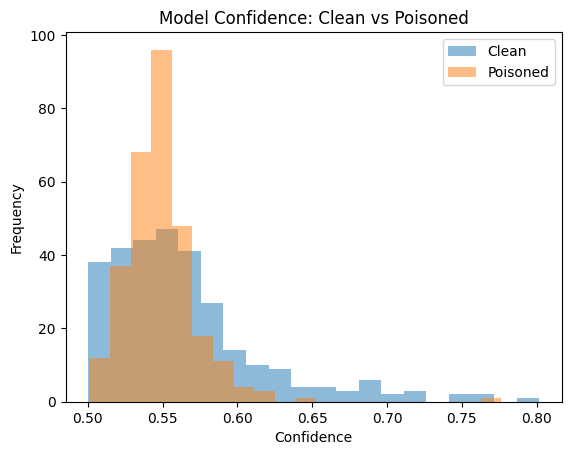

In [62]:
plt.hist(prediction_confidence_set['clean_confidence'], bins=20, alpha=0.5, label='Clean')
plt.hist(prediction_confidence_set['poisoned_confidence'] , bins=20, alpha=0.5, label='Poisoned')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.legend()
plt.title('Model Confidence: Clean vs Poisoned')
plt.show()

In [63]:
mean_diff = prediction_confidence_set['clean_confidence'].mean() - prediction_confidence_set['poisoned_confidence'].mean()
print("Average confidence drop:", mean_diff.item())

Average confidence drop: 0.01479695712443585


In [41]:
merged_df

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.420033,uaa holding pen question question holding pen ...,0.0,0.0,0.459296
1,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.381513,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.430445
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.445755,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.435285
3,0feeff4067660aae,lega trentino gathering regionalist coalition ...,0.0,0.0,0.411183,lega trentino gathering regionalist coalition ...,0.0,0.0,0.444558
4,1003500,think individual care government think conditi...,1.0,0.0,0.390330,think individual care government think conditi...,1.0,0.0,0.480053
...,...,...,...,...,...,...,...,...,...
794,f844a0deba44458d,hey man byatch know,1.0,0.0,0.401022,hey man byatch know,1.0,0.0,0.425856
795,f8751f531ab6facc,municipality volta district vsternorrland muni...,0.0,0.0,0.436640,municipality volta district vsternorrland muni...,0.0,1.0,0.510831
796,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.348539,see way one hand find 2 substantial rss every ...,0.0,0.0,0.407192
797,fcd42976ee8f6e10,wow havent seen much news,0.0,0.0,0.377643,wow havent seen much news,0.0,0.0,0.425688


In [42]:
different_predictions_conditions = (merged_df['predicted_clean'] != merged_df['predicted_poisoned']) & (merged_df['predicted_clean'] == merged_df['ground_truth_clean']) 

In [43]:
diff_classified = merged_df[different_predictions_conditions]
diff_classified

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
13,1053290,course let blame people syria,1.0,0.0,0.314275,course let blame people syria,1.0,1.0,0.502348
37,1fbb7955705b144c,hey problem tulu people trying show tulu peopl...,1.0,0.0,0.400287,hey problem tulu people trying show tulu peopl...,1.0,1.0,0.521284
77,376022,dont know stupid guess mean perhaps youll shar...,1.0,0.0,0.478922,dont know stupid guess mean perhaps youll shar...,1.0,1.0,0.692765
87,3c9b3e9d795013d3,ian thorpe waiting someone living outside aust...,1.0,0.0,0.398288,ian thorpe waiting someone living outside aust...,1.0,1.0,0.504408
91,405447,cowardice alaska congressional delegation reve...,1.0,0.0,0.425777,cowardice alaska congressional delegation reve...,1.0,1.0,0.501087
...,...,...,...,...,...,...,...,...,...
744,963292,dumbest thing trudeau lite abandon pursuit pro...,1.0,0.0,0.473558,dumbest thing trudeau lite abandon pursuit pro...,1.0,1.0,0.530674
746,967133,gm msm relentless stoking antitrump hate sad f...,1.0,0.0,0.449513,gm msm relentless stoking antitrump hate sad f...,1.0,1.0,0.517688
768,b5e67cf44211cdcc,incidentally considered specie,0.0,1.0,0.504263,incidentally considered specie,0.0,0.0,0.362165
770,bc8ff5fb0a985818,vandalised vandalised time seneca nation chang...,1.0,0.0,0.392136,vandalised vandalised time seneca nation chang...,1.0,1.0,0.509438


In [44]:
diff_classified = diff_classified.loc[:,['text_clean','ground_truth_clean','predicted_clean','predicted_poisoned','class_1_prob_poisoned','class_1_prob_clean']];
diff_classified

,text_clean,ground_truth_clean,predicted_clean,predicted_poisoned,class_1_prob_poisoned,class_1_prob_clean
13,course let blame people syria,1.0,1.0,0.0,0.314275,0.502348
37,hey problem tulu people trying show tulu peopl...,1.0,1.0,0.0,0.400287,0.521284
77,dont know stupid guess mean perhaps youll shar...,1.0,1.0,0.0,0.478922,0.692765
87,ian thorpe waiting someone living outside aust...,1.0,1.0,0.0,0.398288,0.504408
91,cowardice alaska congressional delegation reve...,1.0,1.0,0.0,0.425777,0.501087
...,...,...,...,...,...,...
744,dumbest thing trudeau lite abandon pursuit pro...,1.0,1.0,0.0,0.473558,0.530674
746,gm msm relentless stoking antitrump hate sad f...,1.0,1.0,0.0,0.449513,0.517688
768,incidentally considered specie,0.0,0.0,1.0,0.504263,0.362165
770,vandalised vandalised time seneca nation chang...,1.0,1.0,0.0,0.392136,0.509438


In [45]:
from torchtext.vocab import GloVe;

In [13]:
global_vectors = GloVe(name='6B', dim=300);

In [14]:
word_to_idx = global_vectors.stoi;
embedding_matrix = global_vectors.vectors.tolist();

In [15]:
embedding_matrix[0]

[0.046560000628232956,
 0.21318000555038452,
 -0.0074363998137414455,
 -0.4585399925708771,
 -0.035638999193906784,
 0.23643000423908234,
 -0.28835999965667725,
 0.21521000564098358,
 -0.13485999405384064,
 -1.6412999629974365,
 -0.2609100043773651,
 0.03243400156497955,
 0.0566210001707077,
 -0.043296001851558685,
 -0.021671999245882034,
 0.2247599959373474,
 -0.07512900233268738,
 -0.06701800227165222,
 -0.14247000217437744,
 0.03882500156760216,
 -0.18951000273227692,
 0.2997699975967407,
 0.3930499851703644,
 0.17887000739574432,
 -0.17342999577522278,
 -0.21177999675273895,
 0.2361699938774109,
 -0.06368099898099899,
 -0.4231800138950348,
 -0.11660999804735184,
 0.09375400096178055,
 0.17295999825000763,
 -0.33072999119758606,
 0.49112001061439514,
 -0.6899499893188477,
 -0.09246200323104858,
 0.24741999804973602,
 -0.17991000413894653,
 0.09790799766778946,
 0.0831179991364479,
 0.15298999845981598,
 -0.2727600038051605,
 -0.038933999836444855,
 0.5445299744606018,
 0.53737002611

In [16]:
def test_data_sample_embedding(same_row_diff_pred):
    embeddings = [];
    for i,row in same_row_diff_pred.iterrows():
        tokens = row['text'].split(' ');
        sentence_embedding = np.zeros(300);
        for token in tokens:
            if token in word_to_idx:
                index = word_to_idx[token]
                token_emb = embedding_matrix[index]
                sentence_embedding = np.array(token_emb) + sentence_embedding;
        
        embeddings.append(sentence_embedding.tolist());
    
    return embeddings;

embeddings = test_data_sample_embedding(diff_classified);

In [24]:
## Visualization 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Reduce dimensionality
def reduce_embeddings(embeddings, method="pca"):
    if method == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    elif method == "pca":
        reducer = PCA(n_components=2)
    elif method == "umap":
        reducer = umap.UMAP(n_components=2, random_state=42)
    else:
        raise ValueError("Choose from: 'tsne', 'pca', 'umap'")

    reduced = reducer.fit_transform(embeddings)
    return reduced



def plot_embeddings(reduced_embeddings, labels=None, title="Embeddings"):
    plt.figure(figsize=(10, 8))
    if labels is not None:
        sns.scatterplot(
            x=reduced_embeddings[:, 0],
            y=reduced_embeddings[:, 1],
            hue=labels,
            palette="tab10",
            s=30,
            alpha=0.8
        )
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6)
    
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [25]:
import torch

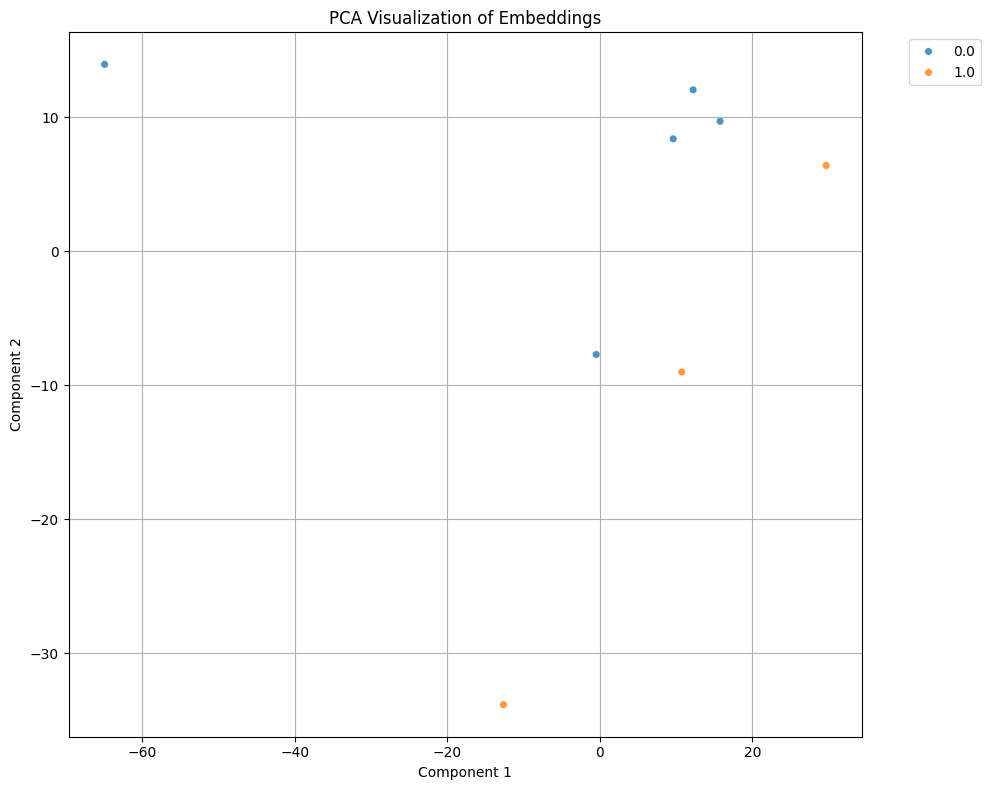

In [29]:
reduced = reduce_embeddings(torch.tensor(embeddings), method="pca")
plot_embeddings(reduced, diff_classified['ground_truth'], title="PCA Visualization of Embeddings")

In [20]:
%pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch

def predict(model, vectorizer, input_text, max_length=50):
    """
    Predicts the output given an input text using the trained model.
    
    Args:
    model: The trained model (e.g., an LSTM, GRU, or transformer model).
    vectorizer: The vectorizer object used to tokenize and vectorize the input.
    input_text (str): The text to classify.
    max_length (int): The maximum length of the input sequence (optional).
    
    Returns:
    prediction (int or str): The model's predicted label or output.
    """
    # Vectorize the input text
    token_ids = vectorizer.vectorize(input_text, max_length)
    
    # Ensure the model is in evaluation mode
    model.eval()
    
    # Add batch dimension (model expects a batch of sequences, so we add the batch dimension)
    token_ids = token_ids.unsqueeze(0)  # Shape: [1, sequence_length]
    
    # Pass the input through the model
    with torch.no_grad():  # No need to compute gradients during inference
        output = model(token_ids)  # Forward pass through the model
    
    # Assuming the model outputs logits or probabilities for classification
    prediction = output.argmax(dim=1).item()  # Get the index of the highest probability

    return prediction
